# Aurora Policing Project

## About the policing data

Throughout this project, I will be analyzing a dataset of traffic stops in Aurora Colorado that was collected by the "Stanford Open Policing Project". [Stanford Open Policing Project Data](https://openpolicing.stanford.edu/data/)



<table>
  <tr>
    <td>Column name</td>
    <td>Column meaning</td>
    <td>Example value</td>
  </tr>
  <tr>
    <td>raw_row_number</td>
    <td>An number used to join clean data back to the raw data</td>
    <td>38299</td>
  </tr>
  <tr>
    <td>date</td>
    <td>The date of the stop, in YYYY-MM-DD format. Some states do not provide
    the exact stop date: for example, they only provide the year or quarter in
    which the stop occurred. For these states, stop_date is set to the date at
    the beginning of the period: for example, January 1 if only year is
    provided.</td>
    <td>"2017-02-02"</td>
  </tr>
  <tr>
    <td>time</td>
    <td>The 24-hour time of the stop, in HH:MM format.</td>
    <td>20:15</td>
  </tr>
  <tr>
    <td>location</td>
    <td>The freeform text of the location. Occasionally, this represents the
    concatenation of several raw fields, i.e. street_number, street_name</td>
    <td>"248 Stockton Rd."</td>
  </tr>
  <tr>
    <td>lat</td>
    <td>The latitude of the stop. If not provided by the department, we
    attempt to geocode any provided address or location using
    Google Maps. Google Maps returns a "best effort" response, which may not
    be completely accurate if the provided location was malformed or
    underspecified. To protect against suprious responses, geocodes more than
    4 standard deviations from the median stop lat/lng are set to NA.
    <td>72.23545</td>
  </tr>
  <tr>
    <td>lng</td>
    <td>The longitude of the stop. If not provided by the department, we
    attempt to geocode any provided address or location using
    Google Maps. Google Maps returns a "best effort" response, which may not
    be completely accurate if the provided location was malformed or
    underspecified. To protect against suprious responses, geocodes more than
    4 standard deviations from the median stop lat/lng are set to NA.
    </td>
    <td>115.2808</td>
  </tr>
  
  <tr>
    <td>district</td>
    <td>Police district. If not provided, but we have retrieved police
    department shapfiles and the location of the stop, we geocode the stop and
    find the district using the shapefiles.</td>
    <td>8</td>
  </tr>
  
  <tr>
    <td>subject_age</td>
    <td>The age of the stopped subject. When date of birth is given, we
    calculate the age based on the stop date. Values outside the range of
    10-110 are coerced to NA.</td>
    <td>54.23</td>
  </tr>
  <tr>
    <td>subject_race</td>
    <td>The race of the stopped subject. Values are standardized to white,
    black, hispanic, asian/pacific islander, and other/unknown</td>
    <td>"hispanic"</td>
  </tr>
  <tr>
    <td>subject_sex</td>
    <td>The recorded sex of the stopped subject.</td>
    <td>"female"</td>
  </tr>
 
  <tr>
    <td>type</td>
    <td>Type of stop: vehicular or pedestrian.</td>
    <td>"vehicular"</td>
  </tr>
  
  <tr>
    <td>violation</td>
    <td>Specific violation of stop where provided. What is recorded here varies
    widely across police departments.</td>
    <td>"SPEEDING 15-20 OVER"</td>
  </tr>
  <tr>
    <td>citation_issued</td>
    <td>Indicates whether a citation was issued.</td>
    <td>TRUE</td>
  </tr>
  
  <tr>
    <td>outcome</td>
    <td>The strictest action taken among arrest, citation, warning, and
    summons.</td>
    <td>"citation"</td>
  </tr>
  
</table>



## Preparing the Aurora policing data for analysis

In [1]:
# Import numpy library
import numpy as np

In [2]:
# Import pandas library 
import pandas as pd

In [3]:
# Import matplotlib.pyplot library 
import matplotlib.pyplot as plt

In [4]:
# Import seaborn library
import seaborn as sns

In [98]:
from datetime import datetime

In [5]:
# Read file into dataframe named data 
data = pd.read_csv("co_aurora_2019_02_25 copy.csv")

### Examing the dataset

In [6]:
# Examine the head of dataframe 
data.head()

,raw_row_number,date,time,location,lat,lng,district,subject_age,subject_race,subject_sex,type,violation,citation_issued,outcome
0,1,1/1/12,9:14:00,S I225 NB HWY AT E ALAMEDA AVE,NaN,NaN,NaN,27.376370,white,male,vehicular,Speeding (20+ Over) - Muni Statue 1101,True,citation
1,2,1/1/12,9:30:00,2600 S I225 NB HWY,NaN,NaN,NaN,23.658287,black,female,vehicular,Speeding (20+ Over) - Muni Statue 1101,True,citation
2,3,1/1/12,9:36:00,N I225 SB HWY AT E 6TH AVE,39.725279,-104.821160,2.0,23.088801,white,male,vehicular,Speeding (20+ Over) - Muni Statue 1101,True,citation
3,4,1/1/12,9:40:00,2300 BLOCK S I225 NB HWY,NaN,NaN,NaN,38.503239,white,female,vehicular,Speeding (20+ Over) - Muni Statue 1101,True,citation
4,5,1/1/12,9:46:00,E VIRGINIA PL AT S PEORIA ST,39.706912,-104.847213,1.0,75.429441,white,male,vehicular,Failed to Present Evidence of Insurance Upon R...,True,citation


In [7]:
data.dtypes

raw_row_number       int64
date                object
time                object
location            object
lat                float64
lng                float64
district           float64
subject_age        float64
subject_race        object
subject_sex         object
type                object
violation           object
citation_issued       bool
outcome             object
dtype: object

#### Aurora District information 
[Aurora District (1,2,3) Map](https://wiki.radioreference.com/images/3/3b/Aurora_Beat_Map.pdf)

## Dropping columns
Dropping the columns which are not useful to analysis. 

In [8]:
# Count the number of missing values in each column
print(data.isnull().sum())

raw_row_number         0
date                   0
time                 943
location              12
lat                31629
lng                31629
district           33838
subject_age         5863
subject_race           4
subject_sex         2006
type                4278
violation           3571
citation_issued        0
outcome                0
dtype: int64


In [9]:
data.shape

(174363, 14)

#### Dropping raw_row_number, because I will not use this number as reference number

In [10]:
data.drop(['raw_row_number'], axis = 'columns', inplace = True)
print(data.shape)

(174363, 13)


#### Comparing 'citation_issued' and 'outcome' columns

In [11]:
data.citation_issued.value_counts()

True    174363
Name: citation_issued, dtype: int64

In [12]:
data.outcome.value_counts()

citation    174363
Name: outcome, dtype: int64

In [13]:
data.shape

(174363, 13)

All drivers were cited I can drop both 'citation_issued' and 'outcome' columns.

In [14]:
data.drop(['citation_issued','outcome'], axis = 1 , inplace = True)

#### Dropping lat, lng, and district columns
I will analyze the data for entire Aurora city, so I will not use specific location data.

In [15]:
# Drop 'lat', and 'lng' columns
data.drop(['lat','lng', 'district','location'], axis = 'columns', inplace = True)
print(data.shape)

(174363, 7)


I will drop 'type' column because type pedestrian only has 24 rows out of 163803. 

In [16]:
data.type.value_counts()

vehicular     170061
pedestrian        24
Name: type, dtype: int64

#### Dropping rows having 'type' value 'pedestrian'
'type' column has very small portion of 'pedestrian'. I will drop those rows.

In [17]:
# Check data shape befor dropping
data.shape

(174363, 7)

In [18]:
# Drop rows which has pedestrian data
data.drop(data[data['type'] == 'pedestrian'].index, inplace = True)

In [19]:
data.shape

(174339, 7)

In [20]:
# Drop 'type' column
data.drop(['type'], axis = 'columns', inplace = True)

In [21]:
# Check data shape after dropping column 'type'
data.shape

(174339, 6)

#### Dropping rows having missing values
I will drop the rows which contain any missing values if the fraction of missing row is small. (less than 5%)

In [22]:
# Calculate the percentage of missing data 
print(data.isnull().sum()/data.shape[0])

date            0.000000
time            0.005409
subject_age     0.033630
subject_race    0.000023
subject_sex     0.011506
violation       0.020483
dtype: float64


In [23]:
data.dropna(subset= ['time', 'subject_age', 'subject_race', 'subject_sex', 'violation'], inplace = True)
print(data.shape)

(163964, 6)


In [24]:
# Count the number of missing values in each column (again)
print(data.isnull().sum())

date            0
time            0
subject_age     0
subject_race    0
subject_sex     0
violation       0
dtype: int64


In [25]:
# Examine the shape of the Dataframe
data.shape

(163964, 6)

In [26]:
### Age rounded to integer
data['subject_age'] = data['subject_age'].round().astype(int)

In [27]:
data['subject_age'].head()

0    27
1    24
2    23
3    39
4    75
Name: subject_age, dtype: int64

In [28]:
data.head()

,date,time,subject_age,subject_race,subject_sex,violation
0,1/1/12,9:14:00,27,white,male,Speeding (20+ Over) - Muni Statue 1101
1,1/1/12,9:30:00,24,black,female,Speeding (20+ Over) - Muni Statue 1101
2,1/1/12,9:36:00,23,white,male,Speeding (20+ Over) - Muni Statue 1101
3,1/1/12,9:40:00,39,white,female,Speeding (20+ Over) - Muni Statue 1101
4,1/1/12,9:46:00,75,white,male,Failed to Present Evidence of Insurance Upon R...


### Examining traffic violations

In [29]:
data.violation.value_counts()

Speeding (10-19 Over)                                           67987
Failed to Present Evidence of Insurance Upon Request            13741
Failed to Obey Seat Belt Requirements Adult                      7688
Speeding (20+ Over) - Muni Statue 1101                           7134
Disregarded Stop Sign                                            6173
Expired License Plates                                           3870
Right Turn on Red Light When Pro-Muni St 604(1)(c)(I)(A)         3005
Failed to Obey Signal Light (Muni Statute 15-5(c)(1)             2953
Failed to Observe or Disregarded Traffic Control Device          2943
Drove Veh While License Suspended                                2899
Made U Turn Where Prohibited (Muni Statute 603(1)                2641
Speeding (25++ over)  Muni statute (1101)                        2195
Failed to Obey Seat Belt Requirements                            2021
Vehicle With Defective/Improper or No Tail Lamps                 1867
Tinted Windows - Mun

In [30]:
data.loc[data['violation'].str.contains("Speed") == True,'violation'].value_counts()

Speeding (10-19 Over)                                           67987
Speeding (20+ Over) - Muni Statue 1101                           7134
Speeding (25++ over)  Muni statute (1101)                        2195
Speeding (40 mph or greater over speed limit)                     811
Speeding (1-4 Over)                                               373
Speeding (5-9 Over) - Muni Statue 1101                            223
Speeding 40+ over speed limit                                     151
Speeding too Fast for Conditions - Muni Statue 1101(3)             87
Speeding (10-14 Over 65 Limit)                                     80
Speed Contest (Muni statute 1105(1)                                77
Speeding (5-9 mph over limit)                                      65
Speeding (10-19 mph over max 75 mph limit)                         65
Speeding (20-24 mph over max 75 mph limit)                         62
Speeding (20-24 mph over limit)                                    56
Speeding (1-4 mph ov

In [31]:
data.loc[data['violation'].str.contains("Speed") == True,'violation'] = "Speeding"

In [32]:
data.loc[data['violation'].str.contains("Seat Belt")== True, 'violation'].value_counts()

Failed to Obey Seat Belt Requirements Adult    7688
Failed to Obey Seat Belt Requirements          2021
Failed to Obey Seat Belt Requirements Child       1
Name: violation, dtype: int64

In [33]:
data.loc[data['violation'].str.contains("Seat Belt")== True, 'violation'] = "Failed to Obey Seat Belt Requirements"

In [34]:
data.loc[data['violation'].str.contains("Stop Sign")== True, 'violation'].value_counts()

Disregarded Stop Sign                                       6173
Driver Failed to Yield ROW at Stop Sign                      177
Disregarded Stop Sign at Through Highways                    169
Disregarded Stop Sign or Failed to Yield ROW at Thru Hwy      19
Name: violation, dtype: int64

In [35]:
data.loc[data['violation'].str.contains("Stop Sign")== True, 'violation'] = "Disregarded Stop Sign"

In [36]:
data.loc[data['violation'].str.contains("License|Registration")== True, 'violation'].value_counts()

Expired License Plates                                          3870
Drove Veh While License Suspended                               2899
Drove Veh Without Valid Drivers License                         1431
Failed To Display Valid Registration/Improper Registration       201
No License Plate Light - Muni Statute 206(3)                     165
Illegal License Plate Cover                                       90
No Registration                                                   86
Drove Veh When License Revoked as Habitual Offender               79
No License Plate Light                                            79
No License Plates                                                 56
Drove Veh Without Valid License on Person                         54
Drove Veh While License Canceled                                  46
Drove Veh While License Denied                                    34
Drove Veh While License Revoked                                   25
No Registration in Vehicle        

In [37]:
data.loc[data['violation'].str.contains("License")== True, 'violation'] = "License/Registration Violation"

In [38]:
data.loc[(data['violation'].str.contains("Signal Light|Red|Green")== True), 'violation'] .value_counts()

Right Turn on Red Light When Pro-Muni St 604(1)(c)(I)(A)       3005
Failed to Obey Signal Light (Muni Statute 15-5(c)(1)           2953
Violation of Green Turn Arrow - Muni Statute 604(1)(a)(II)     1547
Prohibited Right Turn on Red Signal Light                       150
Failed To Stop For Red Light At Proper Location                 148
Violation of Red Signal Light  (muni 604(1)(c)(I)                37
Failed to Yield Right of Way on Right Turn after Red             34
Cut Thru Private Property Avoid Redlight                         26
Violated Red Signal Arrow                                        22
Made Right Turn On Red Light When Prohibited (by sign)           18
Right Turn on Red Light when Prohibited                          11
No Red Light/Flag at Rear - Muni Statute 209                      5
Unauthorized Vehicle Possesion/Displayed Red Or Blue Lights       5
Green Straight Thru Arrow Alone                                   4
Violation of Red Signal Light                   

In [39]:
data.loc[data['violation'].str.contains("Signal Light|Red Light|Green")== True, 'violation'] = "Failed to Obey Signal Lights"

In [40]:
data.violation.value_counts()

Speeding                                                        79564
Failed to Present Evidence of Insurance Upon Request            13741
Failed to Obey Seat Belt Requirements                            9710
License/Registration Violation                                   8852
Failed to Obey Signal Lights                                     7892
Disregarded Stop Sign                                            6538
Failed to Observe or Disregarded Traffic Control Device          2943
Made U Turn Where Prohibited (Muni Statute 603(1)                2641
Vehicle With Defective/Improper or No Tail Lamps                 1867
Tinted Windows - Muni Statute 227(1)                             1861
Glass in Vehicle Did Not Permit Norman Vision                    1828
Vehicle with one headlight (Muni 205(1))                         1802
Headlamps to be Lit                                              1483
Child Restraint System Required                                  1372
Careless Driving    

In [41]:
data.violation.value_counts(normalize = True)

Speeding                                                        0.485253
Failed to Present Evidence of Insurance Upon Request            0.083805
Failed to Obey Seat Belt Requirements                           0.059220
License/Registration Violation                                  0.053987
Failed to Obey Signal Lights                                    0.048133
Disregarded Stop Sign                                           0.039875
Failed to Observe or Disregarded Traffic Control Device         0.017949
Made U Turn Where Prohibited (Muni Statute 603(1)               0.016107
Vehicle With Defective/Improper or No Tail Lamps                0.011387
Tinted Windows - Muni Statute 227(1)                            0.011350
Glass in Vehicle Did Not Permit Norman Vision                   0.011149
Vehicle with one headlight (Muni 205(1))                        0.010990
Headlamps to be Lit                                             0.009045
Child Restraint System Required                    

Almost half of all violations are for speeding, followed by insurance violations and seat belt violations.

In [42]:
# Add 'count_violation' column to analyze 'violation' column more easily by types of violation.
data['count_violation(%)'] = data['violation'].map(data['violation'].value_counts(normalize = True))

In [43]:
# Change 'violation' type to 'Others' where the 'count_violation'(% of total violations) is less than 1%

In [44]:
data.loc[data['count_violation(%)'] < 0.01, 'violation'] = 'Others'

In [45]:
data['violation'].value_counts()

Speeding                                                   79564
Others                                                     24725
Failed to Present Evidence of Insurance Upon Request       13741
Failed to Obey Seat Belt Requirements                       9710
License/Registration Violation                              8852
Failed to Obey Signal Lights                                7892
Disregarded Stop Sign                                       6538
Failed to Observe or Disregarded Traffic Control Device     2943
Made U Turn Where Prohibited (Muni Statute 603(1)           2641
Vehicle With Defective/Improper or No Tail Lamps            1867
Tinted Windows - Muni Statute 227(1)                        1861
Glass in Vehicle Did Not Permit Norman Vision               1828
Vehicle with one headlight (Muni 205(1))                    1802
Name: violation, dtype: int64

In [46]:
data.head()

,date,time,subject_age,subject_race,subject_sex,violation,count_violation(%)
0,1/1/12,9:14:00,27,white,male,Speeding,0.485253
1,1/1/12,9:30:00,24,black,female,Speeding,0.485253
2,1/1/12,9:36:00,23,white,male,Speeding,0.485253
3,1/1/12,9:40:00,39,white,female,Speeding,0.485253
4,1/1/12,9:46:00,75,white,male,Failed to Present Evidence of Insurance Upon R...,0.083805


## About the aurora weather data
[NOAA](https://www.ncdc.noaa.gov/cdo-web/)

<p style='text-align: justify;'> 
I added new weather data to determind if whether conditions have impact on police behavior. The weather data was collected by the National Centers for Environmental Information , and the duration of the weather data is from 01/01/2012 to 12/31/2016.
One possible hypothesis is that weather conditions impact on police behavior during traffic stop. Even though dataset has specific stop locatioin, I would use the data from one station("Centennial International Airpot Station") near Aurora. This is not ideal, but Aurora is a small city and airport weather statation tends to have more weather dataset than the others, it will give me a general idea of the weather condition thourghout the city. </p> 

## Preparing Aurora weather data for analysis

### Examing the dataset

In [47]:
weather = pd.read_csv('weather.csv')

In [48]:
weather.head()

,STATION,NAME,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
0,USW00093067,"DENVER CENTENNIAL AIRPORT, CO US",2012-01-01,6.04,0.0,NaN,NaN,NaN,38.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00093067,"DENVER CENTENNIAL AIRPORT, CO US",2012-01-02,6.71,0.0,NaN,NaN,NaN,50.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00093067,"DENVER CENTENNIAL AIRPORT, CO US",2012-01-03,6.26,0.0,NaN,NaN,NaN,55.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00093067,"DENVER CENTENNIAL AIRPORT, CO US",2012-01-04,6.04,0.0,NaN,NaN,NaN,58.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00093067,"DENVER CENTENNIAL AIRPORT, CO US",2012-01-05,4.92,0.0,NaN,NaN,NaN,66.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* PRCP :  Precipitation
* AWND :  Wind speed
* SNOW, SNWD :  Snowfall, Snow depth
* TAVG, TAX, TMIN :  Temperature
* WT01,WT02, ..., WT09 :  Bad weather conditions 
  
     * 01 = Fog, ice fog, or freezing fog 
     * 02 = Heavy fog or heaving freezing fog 
     * 03 = Thunder
     * 04 = Ice pellets, sleet, snow pellets, or small hail
     * 05 = Hail 
     * 06 = Glaze or rime
     * 08 = Smoke or haze
     * 09 = Blowing or drifting snow
 

In [49]:
weather.shape

(1826, 18)

In [50]:
weather.isnull().sum()

STATION       0
NAME          0
DATE          0
AWND          0
PRCP          0
SNOW       1826
SNWD       1826
TAVG       1826
TMAX          1
TMIN          1
WT01       1381
WT02       1759
WT03       1513
WT04       1824
WT05       1804
WT06       1816
WT08       1631
WT09       1808
dtype: int64

#### Dropping columns 'STATION' , 'NAME', 'SNOW', 'SNOWD'

In [51]:
weather.STATION.value_counts()

USW00093067    1826
Name: STATION, dtype: int64

In [52]:
weather.NAME.value_counts()

DENVER CENTENNIAL AIRPORT, CO US    1826
Name: NAME, dtype: int64

Since columns 'STATION' and 'NAME' have only one value 'USW00093067' and 'CENTENNIAL AIRPORT' each, I will drop those two columns. Columns 'SNOW' and 'SNOWD' only have null values, I will also drop those columns.

In [53]:
# Drop 'STATION' and 'NAME' columns
weather.drop(['STATION','NAME'], axis = 'columns', inplace = True)

In [54]:
weather.shape

(1826, 16)

In [55]:
weather.drop(['SNOW','SNWD'], axis = 'columns', inplace = True )

In [56]:
weather.shape

(1826, 14)

<p style =  'text-align: justify; '>
Columns 'TMAX' and 'TMIN'  have to be filled in because everyday has to have max and min temperature. I will caculate the min and max temperature by using 7 consecutive days excluding the day which has null value. </p>

In [57]:
weather[weather['TMIN'].isna()]

,DATE,AWND,PRCP,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
1369,2015-10-02,12.08,0.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
weather[weather['TMAX'].isna()]

,DATE,AWND,PRCP,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
1369,2015-10-02,12.08,0.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


Since null values of 'TMAX' and 'TMIN' are in the same row, I will use the same 7 consecutive days to calculate min and max temperatuer on 2015-10-02. (2015-09-29 ~ 2015-10-05) 

In [59]:
weather.iloc[1366:1373, :]

,DATE,AWND,PRCP,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
1366,2015-09-29,10.51,0.10,NaN,78.0,53.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1367,2015-09-30,5.82,0.00,NaN,79.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1368,2015-10-01,8.28,0.00,NaN,83.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1369,2015-10-02,12.08,0.00,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1370,2015-10-03,9.17,0.00,NaN,69.0,49.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1371,2015-10-04,6.93,0.00,NaN,65.0,46.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1372,2015-10-05,4.92,0.14,NaN,73.0,43.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN


In [60]:
max_temp_for_calculation = weather.iloc[1366:1373,4]

In [61]:
max_temp_for_calculation

1366    78.0
1367    79.0
1368    83.0
1369     NaN
1370    69.0
1371    65.0
1372    73.0
Name: TMAX, dtype: float64

In [62]:
weather.iloc[1369,4] = max_temp_for_calculation.mean(skipna = True)

In [63]:
min_temp_for_calculation = weather.iloc[1366:1373,5]

In [64]:
min_temp_for_calculation

1366    53.0
1367    55.0
1368    55.0
1369     NaN
1370    49.0
1371    46.0
1372    43.0
Name: TMIN, dtype: float64

In [65]:
weather.iloc[1369,5] = min_temp_for_calculation.mean(skipna = True)

In [66]:
weather.iloc[1366:1373,:]

,DATE,AWND,PRCP,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
1366,2015-09-29,10.51,0.10,NaN,78.0,53.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1367,2015-09-30,5.82,0.00,NaN,79.0,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1368,2015-10-01,8.28,0.00,NaN,83.0,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1369,2015-10-02,12.08,0.00,NaN,74.5,50.166667,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1370,2015-10-03,9.17,0.00,NaN,69.0,49.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1371,2015-10-04,6.93,0.00,NaN,65.0,46.000000,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1372,2015-10-05,4.92,0.14,NaN,73.0,43.000000,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN


'TMAX' and 'TMIN' on 2015-10-12 are filled in now.

#### Filliing in average temperature 'TAVG'
I will calculate the values of average temperature ('TAVG') column by calculating the mean of min and max temperature.

In [67]:
weather['TAVG'] = weather[['TMAX','TMIN']].mean(axis=1)

In [68]:
weather.head()

,DATE,AWND,PRCP,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
0,2012-01-01,6.04,0.0,28.0,38.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-02,6.71,0.0,33.0,50.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-03,6.26,0.0,43.0,55.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-04,6.04,0.0,42.5,58.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-05,4.92,0.0,50.5,66.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
weather.isnull().sum()

DATE       0
AWND       0
PRCP       0
TAVG       0
TMAX       0
TMIN       0
WT01    1381
WT02    1759
WT03    1513
WT04    1824
WT05    1804
WT06    1816
WT08    1631
WT09    1808
dtype: int64

### Examing wind speed
Explore the wind data to check for reliability.

In [70]:
weather['AWND'].head()

0    6.04
1    6.71
2    6.26
3    6.04
4    4.92
Name: AWND, dtype: float64

In [71]:
print(weather['AWND'].describe())

count    1826.000000
mean        7.847306
std         2.735757
min         0.670000
25%         6.040000
50%         7.380000
75%         9.170000
max        22.820000
Name: AWND, dtype: float64


Minimum value is above zero, and average value is greter than min and less than max. Also, the numbers are reasonable miles per hour value.

#### Creating a box plot

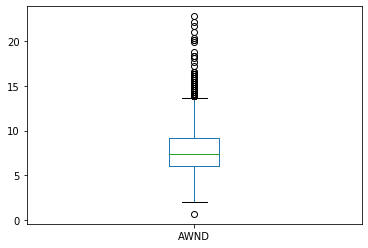

In [72]:
weather['AWND'].plot(kind='box')
plt.show()

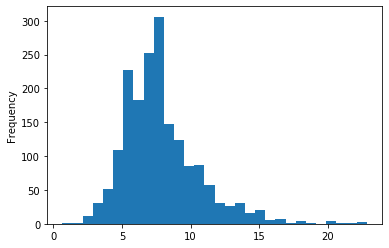

In [73]:
weather['AWND'].plot(kind = 'hist', bins=30)
plt.show()

### Examing temperature
Explore the temperature data to check for reliability. Temperature is measured in degrees Fahrenheit.

In [74]:
print(weather[['TAVG','TMAX','TMIN']].head())

   TAVG  TMAX  TMIN
0  28.0  38.0  18.0
1  33.0  50.0  16.0
2  43.0  55.0  31.0
3  42.5  58.0  27.0
4  50.5  66.0  35.0


In [75]:
# Create data frame 'weather_temp' only contains temperature data.
weather_temp = weather[['TAVG','TMAX', 'TMIN']]

In [76]:
weather_temp.head()

,TAVG,TMAX,TMIN
0,28.0,38.0,18.0
1,33.0,50.0,16.0
2,43.0,55.0,31.0
3,42.5,58.0,27.0
4,50.5,66.0,35.0


In [77]:
weather_temp.shape

(1826, 3)

In [78]:
print(weather[['TAVG','TMAX','TMIN']].describe())

              TAVG         TMAX         TMIN
count  1826.000000  1826.000000  1826.000000
mean     50.930632    64.488226    37.373038
std      17.798633    19.335963    17.032978
min      -7.500000     0.000000   -17.000000
25%      38.000000    51.000000    25.000000
50%      51.500000    66.000000    37.000000
75%      66.500000    81.000000    53.000000
max      82.000000   100.000000    67.000000


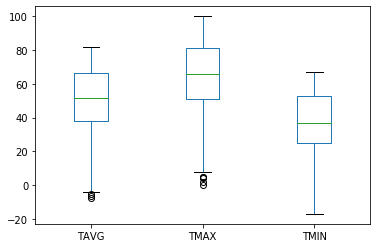

In [79]:
weather[['TAVG', 'TMAX', 'TMIN']].plot(kind = 'box')
plt.show()

### Counting bad weather conditions
The weather dataframe contains 8 columns that start with 'WT'. Each of those represents a bad weather condition. For example, "WT05" indicates "Hail" and "WT09" indicates "Blowing or Drifting Snow". For every row in the dataset, each WT column contains either 1 or NaN meaning the weather condition is not obsereved. I will quantify "how bad" the weather was each day by summing the number of 1s in each row.

In [80]:
# New dataframe 'WT' contains only weather conditions
WT = weather.loc[:,'WT01':'WT09']

In [81]:
WT.isnull().count()

WT01    1826
WT02    1826
WT03    1826
WT04    1826
WT05    1826
WT06    1826
WT08    1826
WT09    1826
dtype: int64

In [82]:
# Replace the missing values with 0.
WT = WT.fillna(0).astype('int')

In [83]:
# Calculate the total number of 1s in each row.
weather['bad_weather'] = WT.sum(axis = 1)

In [84]:
weather['bad_weather'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    2
7    0
8    0
9    0
Name: bad_weather, dtype: int64

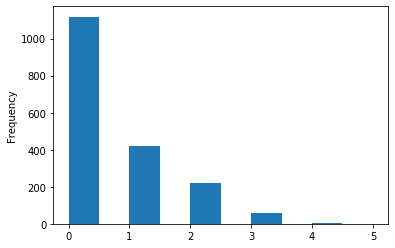

In [85]:
# Create a histogram to visulize
weather.bad_weather.plot(kind = 'hist')
plt.show()

It looks like many days did not have any bad weather conditions and only a small portion of days had more than two bad weather conditions.

### Rating the weather conditions
I used the counts to create rating system for bad weather. I counted the unique values in the bad_weather column and sort the index and create a dictioinary called 'mapping' that maps the bad_weather integers to strings. Then I converted the bad_weather integers to strings by using the 'mapping' dictionary and stored the results in the new column called 'rating'.

* Convert 0 to 'Good'
* Convert 1 through 2 to 'Bad'
* Convert 3 through 4 to 'Worse'

In [86]:
weather.bad_weather.value_counts().sort_index()

0    1118
1     420
2     220
3      61
4       6
5       1
Name: bad_weather, dtype: int64

In [87]:
# Create a dictionary that maps integers to string
mapping = {0:'Good', 1:'Bad', 2:'Bad', 3: 'Worse', 4: 'Worse'}

In [88]:
# Convert the 'bad_weather' integers to string using 'mapping'
weather['weather_rating'] = weather.bad_weather.map(mapping).astype('str')

In [89]:
weather['weather_rating'].head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: weather_rating, dtype: object

In [90]:
weather['weather_rating'].value_counts()

Good     1118
Bad       640
Worse      67
nan         1
Name: weather_rating, dtype: int64

#### Changing the data type to category
There is a few poosible values, so for efficiency, I changed the data type to category and gave it a logical order.

In [91]:
cats = ['Good', 'Bad', 'Worse']

In [92]:
# Change the data type of 'rating' to category
weather['weather_rating'] = weather.weather_rating.astype(pd.api.types.CategoricalDtype(ordered = True, categories = cats))


In [93]:
weather.head()

,DATE,AWND,PRCP,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,bad_weather,weather_rating
0,2012-01-01,6.04,0.0,28.0,38.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Good
1,2012-01-02,6.71,0.0,33.0,50.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Good
2,2012-01-03,6.26,0.0,43.0,55.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Good
3,2012-01-04,6.04,0.0,42.5,58.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Good
4,2012-01-05,4.92,0.0,50.5,66.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Good


I will use 'rating' column to analyze the effects of weather on police behavior.

### Creating a dataframe 'weather_rating' from 'weather' dataframe for merging
I will take only 'DATE' and 'rating' columns to create 'weather_rating' dataframe and I will merge 'data' and 'weather_rating' dataframes to analyze.

In [94]:
weather = weather[['DATE','weather_rating']]

In [646]:
weather.head()

,DATE,weather_rating
0,2012-01-01,Good
1,2012-01-02,Good
2,2012-01-03,Good
3,2012-01-04,Good
4,2012-01-05,Good


## Merging datasets

In [95]:
data.head()

,date,time,subject_age,subject_race,subject_sex,violation,count_violation(%)
0,1/1/12,9:14:00,27,white,male,Speeding,0.485253
1,1/1/12,9:30:00,24,black,female,Speeding,0.485253
2,1/1/12,9:36:00,23,white,male,Speeding,0.485253
3,1/1/12,9:40:00,39,white,female,Speeding,0.485253
4,1/1/12,9:46:00,75,white,male,Failed to Present Evidence of Insurance Upon R...,0.083805


In [96]:
weather.head()

,DATE,weather_rating
0,2012-01-01,Good
1,2012-01-02,Good
2,2012-01-03,Good
3,2012-01-04,Good
4,2012-01-05,Good


In [100]:
# Change 'date' column format to the same format as 'DATE' column of weather dataframe
data.date  = pd.to_datetime(data.date, format = '%Y%m%d')

ValueError: time data '1/1/12' does not match format '%Y%m%d' (match)

dtype('O')

In [654]:
data['Date'].head()

KeyError: 'Date'

In [ ]:
weather['DATE'] = pd.to_datetime(weather['DATE'])

In [ ]:
weather['DATE'].head()

In [ ]:
police_weather_data = pd.merge(left = data, right = weather, left_on = 'Date', right_on = 'DATE', how = 'left')

In [ ]:
police_weather_data.head()

### Creating a DatetimeIndex
I combined 'date' column and 'time' column to convert datetime format.

In [ ]:
combined = police_weather_data.date.str.cat(police_weather_data.time, sep = ' ' )

In [ ]:
police_weather_data['datetime'] = pd.to_datetime(combined)

In [ ]:
police_weather_data.set_index('datetime', inplace = True)

In [ ]:
# Examine the index
police_weather_data.head()

In [ ]:
# Dropping unnecessary date or time columns
police_weather_data.drop(['date', 'time', 'Date', 'DATE'], axis = 1, inplace = True)

In [ ]:
police_weather_data.head()

## Does driver gender affect the violation types?
The question I am trying to answer is whether male and female drivers tend to commit different types of traffic violations.

In [ ]:
# Create a dataframe of female driver
female_driver = police_weather_data[police_weather_data.subject_sex == 'female']

In [ ]:
# create a dataframe of male drivers
male_driver = police_weather_data[police_weather_data.subject_sex == 'male']

In [ ]:
# Count the unique violation values of female driver
female_driver.violation.value_counts(normalize = True).head(5)

In [ ]:
# Count unique values of violation of male driver
male_driver.violation.value_counts(normalize = True).head(5)

In Aurora city, women are about 5 percent more likely to get speed tickets than men, other than that all the other categories of women and men seems pretty much similar. 


## Does driver race affect the violation types?
The question I am trying to answer is whether the race types drivers tend to commit different types of traffic violations. I will analyze top 5 violations.

In [ ]:
# Create a dataframe of white drivers
white = police_weather_data[police_weather_data.subject_race == 'white']

In [ ]:
# Create a dataframe of African/American drivers
black = police_weather_data[police_weather_data.subject_race == 'black']

In [ ]:
# Create a dataframe of Asian/Pacific drivers
asian_pacific = police_weather_data[police_weather_data.subject_race == 'asian/pacific islander']

In [ ]:
# Create a dataframe of all the other drivers
other = police_weather_data[police_weather_data.subject_race == 'other/unknown']

In [ ]:
# Compute the violations by white drivers as portioins
white.violation.value_counts(normalize=True).head(8)

In [ ]:
# Compute the violations by African American drivers as portion
black.violation.value_counts(normalize = True).head(8)

In [ ]:
# Compute the violations by Asian drivers as portion
asian_pacific.violation.value_counts(normalize=True).head(8)

In [ ]:
# Compute the violations by all the other race drivers
other.violation.value_counts(normalize=True).head(8)

White driver are more likely to speed than the other race, but all drivers' main resson to get citation is "Speeding".

## Does driver age affect the violation types?
The question I am trying to answer is whether age of driver tend to commit different types of traffic violations.

## Does time of day affect citation rate?

## Does weather affect the citation rate?